

```
Name: Jing Tian [1 point]
```



# Topic: House Prices (Regression)

A. Problem Introduction: [5 points]
1. Problem formulation: 
2. Data population: 

Answer:
1. The problem is to study the passengers' lives of the Titanic shipwreck on April 15, 1912. Given some information of 891 passengers and the result of whether they survived or not, we need to predict whether the other 418 passengers on board survived. 
2. Data population: 891 passengers of the Titanic shipwreck whose life status has been known, and 418 passengers that we don't know if they survived in the Titanic shipwreck


B. Data [38 points]
1. Kaggle account: 
2. Show the data
3. Data Wrangling
4. Is the data obtained representative for the problem according to your data population? What kind of assumptions are needed that the analysis using the current data can solve the problem?
5. Guess what kind of sampling method maybe used during the data collection and why do you guess so? 



Answer:
1. jingtc20
2. See below
3. See below
4. a. After the data analysis, I think the data is representative for the problem, since the scope of the age, SibSp, Parch is bigger enough and the data distribution is reasonable, such as Pclass and Sex.
b. Assumptions: All the information in the data is real and correct.
5. I guess stratified sampling was used during the data collection, since we have three classes in the train/test data: first, second and third class.

2. Show the data

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [493]:
# show the shape of train data and several lines
df_train = pd.read_csv('/content/train.csv')
print('Shape of train data', df_train.shape)
df_train.head()

Shape of train data (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [494]:
# check if the train data has duplicates
df_train[df_train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [495]:
# show the information of the train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [496]:
# show the shape of test data and several lines
df_test = pd.read_csv('/content/test.csv')
print('Shape of test data', df_test.shape)
df_test.head()

Shape of test data (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [497]:
# check if the train data has duplicates
df_test[df_test.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [498]:
# show the information of the test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


3. Data Wrangling

3.1 Structure: 
The train dataset and test dataset are all tabular data. For train dataset, we have 891 rows and 12 columns. For test dataset, we have 418 rows and 11 columns. The column names in test data and train data are same except that train data has “ground truth” for each passenger which is called "Survived" and test data doesn't.

In [499]:
print('Shape of train data', df_train.shape)
print('Shape of test data', df_test.shape)

Shape of train data (891, 12)
Shape of test data (418, 11)


In [500]:
print('Shape of train data', df_train.columns)
print('Shape of train data', df_test.columns)

Shape of train data Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Shape of train data Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


3.2 Granularity:
Either in the train data or test data, each record represents a single passenger in the Titanic shipwreck. We can further analyze the data by 'Pclass', 'Survived', or 'Sex'.

In [501]:
df_train_pclass = df_train.groupby('Pclass').size().reset_index(name='Num')
df_train_pclass['ticket_class'] = ['first', 'second', 'third']
df_train_pclass

,Pclass,Num,ticket_class
0,1,216,first
1,2,184,second
2,3,491,third


In [502]:
df_train_gender = df_train.groupby('Sex').size().reset_index(name='Num')
df_train_gender

,Sex,Num
0,female,314
1,male,577


In [503]:
df_train_survived = df_train.groupby('Survived').size().reset_index(name='Num')
df_train_survived['result'] = ['dead', 'alive']
df_train_survived

,Survived,Num,result
0,0,549,dead
1,1,342,alive


In [504]:
df_pclass['Num'].tolist()

[216, 184, 491]

Text(0.5, 1.0, 'Analysis of Train Data by Survived')

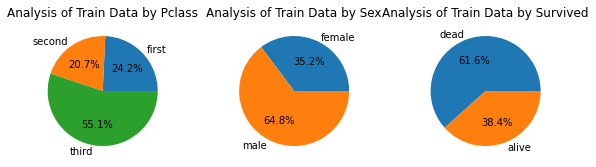

In [505]:
# Data analysis in train data
fig, axs = plt.subplots(1, 3, figsize=(8,8))
fig.tight_layout(w_pad=2.0)

axs[0].pie(df_train_pclass['Num'].tolist(), labels=df_train_pclass['ticket_class'], autopct='%1.1f%%')
axs[0].set_title('Analysis of Train Data by Pclass') 

axs[1].pie(df_train_gender['Num'].tolist(), labels=df_train_gender['Sex'], autopct='%1.1f%%')
axs[1].set_title('Analysis of Train Data by Sex') 

axs[2].pie(df_train_survived['Num'].tolist(), labels=df_train_survived['result'], autopct='%1.1f%%')
axs[2].set_title('Analysis of Train Data by Survived') 

In [506]:
df_test_pclass = df_test.groupby('Pclass').size().reset_index(name='Num')
df_test_pclass['ticket_class'] = ['first', 'second', 'third']
df_test_pclass

,Pclass,Num,ticket_class
0,1,107,first
1,2,93,second
2,3,218,third


In [507]:
df_test_gender = df_test.groupby('Sex').size().reset_index(name='Num')
df_test_gender

,Sex,Num
0,female,152
1,male,266


Text(0.5, 1.0, 'Analysis of Test Data by Sex')

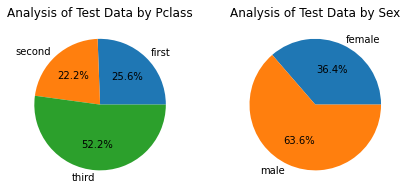

In [508]:
# Data analysis in test data
fig, axs = plt.subplots(1, 2, figsize=(6,6))
fig.tight_layout(w_pad=2.0)

axs[0].pie(df_test_pclass['Num'].tolist(), labels=df_test_pclass['ticket_class'], autopct='%1.1f%%')
axs[0].set_title('Analysis of Test Data by Pclass') 

axs[1].pie(df_test_gender['Num'].tolist(), labels=df_test_gender['Sex'], autopct='%1.1f%%')
axs[1].set_title('Analysis of Test Data by Sex') 

3.3 Scope:
In general, larger scope is more useful than smaller scope since we can filter larger scope down to a smaller scope but often can't go from smaller scope to larger scope. For the train data, the scope of age, fare, sibsp, and parch are 79.58, 512.33, 8, 6 respectively. For the test data, the scope of age, fare, sibsp, and parch are 75.83, 512.33, 8, 9 respectively.

In [509]:
# scope analysis of train data
print('Scope of Age: ', df_train['Age'].max() - df_train['Age'].min())
print('Scope of Fare: ', df_train['Fare'].max() - df_train['Fare'].min())
print('Scope of SibSp: ', df_train['SibSp'].max() - df_train['SibSp'].min())
print('Scope of Parch: ', df_train['Parch'].max() - df_train['Parch'].min())

Scope of Age:  79.58
Scope of Fare:  512.3292
Scope of SibSp:  8
Scope of Parch:  6


Text(0.5, 1.0, 'Analysis of Test Data by Parch')

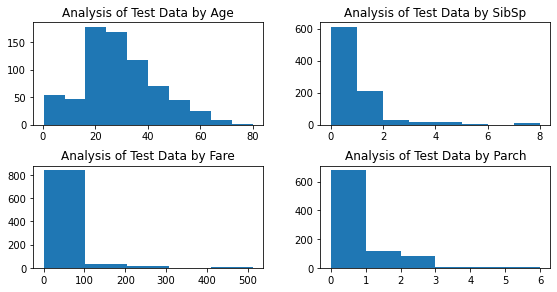

In [510]:
# Data analysis in train data
fig, axs = plt.subplots(2, 2, figsize=(8,4))
fig.tight_layout(w_pad=2.0, h_pad = 2.0)

axs[0, 0].hist(df_train['Age'], bins=10)
axs[0, 0].set_title('Analysis of Test Data by Age') 

axs[1, 0].hist(df_train['Fare'], bins=5)
axs[1, 0].set_title('Analysis of Test Data by Fare') 

axs[0, 1].hist(df_train['SibSp'], bins=8)
axs[0, 1].set_title('Analysis of Test Data by SibSp') 

axs[1, 1].hist(df_train['Parch'], bins=6)
axs[1, 1].set_title('Analysis of Test Data by Parch') 

In [511]:
# scope analysis of test data
print('Scope of Age: ', df_test['Age'].max() - df_test['Age'].min())
print('Scope of Fare: ', df_test['Fare'].max() - df_test['Fare'].min())
print('Scope of SibSp: ', df_test['SibSp'].max() - df_test['SibSp'].min())
print('Scope of Parch: ', df_test['Parch'].max() - df_test['Parch'].min())

Scope of Age:  75.83
Scope of Fare:  512.3292
Scope of SibSp:  8
Scope of Parch:  9


Text(0.5, 1.0, 'Analysis of Test Data by Parch')

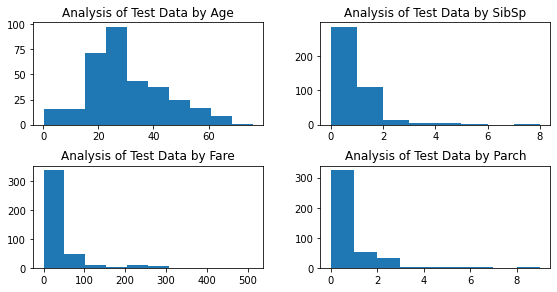

In [512]:
# Data analysis in test data
fig, axs = plt.subplots(2, 2, figsize=(8,4))
fig.tight_layout(w_pad=2.0, h_pad = 2.0)

axs[0, 0].hist(df_test['Age'], bins=10)
axs[0, 0].set_title('Analysis of Test Data by Age') 

axs[1, 0].hist(df_test['Fare'], bins=10)
# axs[1, 0].set_xticks(list(range(0, 600, 60)))
axs[1, 0].set_title('Analysis of Test Data by Fare') 

axs[0, 1].hist(df_test['SibSp'], bins=8)
axs[0, 1].set_title('Analysis of Test Data by SibSp') 

axs[1, 1].hist(df_test['Parch'], bins=9)
axs[1, 1].set_title('Analysis of Test Data by Parch') 

3.4 Temporality: 
Temporality refers to how the data are situated in time and specifically to the date and time fields in the dataset. Since all the data don't include any information related to time, I think this property cannot be identified in this problem.

3.5 Faithfulness:
Combining the analysis of train data and test data, the scope of age is [0.17,80], the scope of fare is [0,512.33], the scope of sibsp is [0,8], and the scope of parch is [0,9]. It seems like reasonable and credible.

In [513]:
# range of train data
print('Range of Age: ', df_train['Age'].min(), "-", df_train['Age'].max())
print('Range of Fare: ', df_train['Fare'].min(), "-",  df_train['Fare'].max())
print('Range of SibSp: ', df_train['SibSp'].min(), "-",  df_train['SibSp'].max())
print('Range of Parch: ', df_train['Parch'].min(), "-",  df_train['Parch'].max())

Range of Age:  0.42 - 80.0
Range of Fare:  0.0 - 512.3292
Range of SibSp:  0 - 8
Range of Parch:  0 - 6


In [514]:
# range of test data
print('Range of Age: ', df_test['Age'].min(), "-", df_test['Age'].max())
print('Range of Fare: ', df_test['Fare'].min(), "-",  df_test['Fare'].max())
print('Range of SibSp: ', df_test['SibSp'].min(), "-",  df_test['SibSp'].max())
print('Range of Parch: ', df_test['Parch'].min(), "-",  df_test['Parch'].max())

Range of Age:  0.17 - 76.0
Range of Fare:  0.0 - 512.3292
Range of SibSp:  0 - 8
Range of Parch:  0 - 9
